In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [16]:
dexcom_df = pd.read_csv("C:\\Users\\namil\\Downloads\\CaM01-001_CGM_Dexcom.csv")
libre_df = pd.read_csv("C:\\Users\\namil\\Downloads\\CaM01-001_CGM_Libre.csv")

In [17]:
dexcom_df['Date_Time'] = pd.to_datetime(dexcom_df['Date_Time'])
libre_df['Date_Time'] = pd.to_datetime(libre_df['Date_Time'])

In [18]:
start_date = '2021-09-18'
date_array = []
days = 14
for i in range(days):
    date_array.append(start_date[:-2] + str(int(start_date[-2:])+i))

In [19]:
date_array

['2021-09-18',
 '2021-09-19',
 '2021-09-20',
 '2021-09-21',
 '2021-09-22',
 '2021-09-23',
 '2021-09-24',
 '2021-09-25',
 '2021-09-26',
 '2021-09-27',
 '2021-09-28',
 '2021-09-29',
 '2021-09-30',
 '2021-09-31']

In [20]:
j = 5
subset_df = dexcom_df[dexcom_df['Date_Time'].dt.date == pd.to_datetime(date_array[j]).date()]
lib_df = libre_df[libre_df['Date_Time'].dt.date == pd.to_datetime(date_array[j]).date()]

In [24]:
bg_array = subset_df['BG'].to_numpy()
time_array = subset_df['Date_Time']
bg_array2 = lib_df['BG'].to_numpy()
time_array2 = lib_df['Date_Time']
print(len(bg_array))
print(len(time_array))
print(len(bg_array2))

288
288
97


Text(0.5, 1.0, 'blood glucose of subject 0001 on day 6')

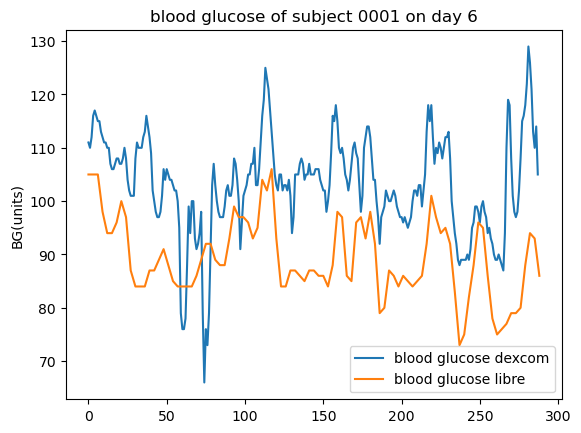

In [25]:
#plot dexcom vs libre
plt.plot(bg_array, label="blood glucose dexcom")
xpoints = []
for i in range(0, 97):
    xpoints.append(3*i)
plt.plot(xpoints, bg_array2, label="blood glucose libre")
plt.ylabel("BG(units)")
plt.legend()
plt.title(f'blood glucose of subject 0001 on day {j+1}')


Text(0.5, 1.0, 'blood glucose of subject 0001 on day 6')

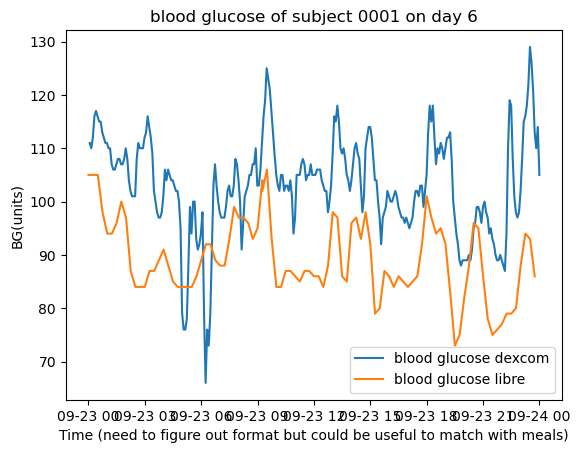

In [26]:
#same plot but with time in x axis
plt.plot(time_array, bg_array, label="blood glucose dexcom")
plt.plot(time_array2, bg_array2, label="blood glucose libre")
plt.xlabel("Time (need to figure out format but could be useful to match with meals)")
plt.ylabel("BG(units)")
plt.legend()
plt.title(f'blood glucose of subject 0001 on day {j+1}')

#try highlighting food times

In [27]:
calories_df = pd.read_csv("C:\\Users\\namil\\Downloads\\CaM01-001_calories - CaM01-001_calories.csv")
calories_df['Date_Time'] = pd.to_datetime(calories_df['Date_Time'])

mets_df = pd.read_csv("C:\\Users\\namil\\Downloads\\CaM01-001_mets.csv")
mets_df['Date_Time'] = pd.to_datetime(mets_df['Date_Time'])

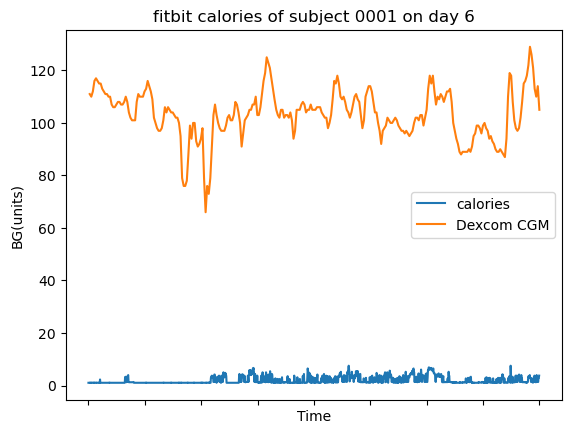

In [32]:
subset_cals = calories_df[calories_df['Date_Time'].dt.date == pd.to_datetime(date_array[j]).date()]
today_cals = subset_cals['Calories'].to_numpy()
time_cals = subset_cals['Date_Time']
plt.plot(time_cals, today_cals, label="calories")

#could maybe plot cgm with this to see
plt.plot(time_array, bg_array, label = "Dexcom CGM")

plt.xlabel("Time")
plt.ylabel("BG(units)")
plt.legend()
plt.title(f'fitbit calories of subject 0001 on day {j+1}')

#hide x axis vals for now
ax = plt.gca()
ax.xaxis.set_tick_params(labelbottom=False)

Text(0.5, 1.0, 'Calories for subject 0001 on day 6')

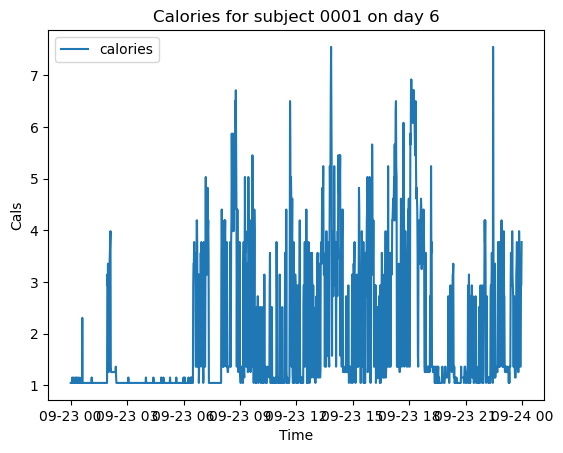

In [33]:
plt.plot(time_cals, today_cals, label="calories")
plt.xlabel("Time")
plt.ylabel("Cals")
plt.legend()
plt.title(f'Calories for subject 0001 on day {j+1}')

Text(0.5, 1.0, 'METs activity for subject 0001 on day 6')

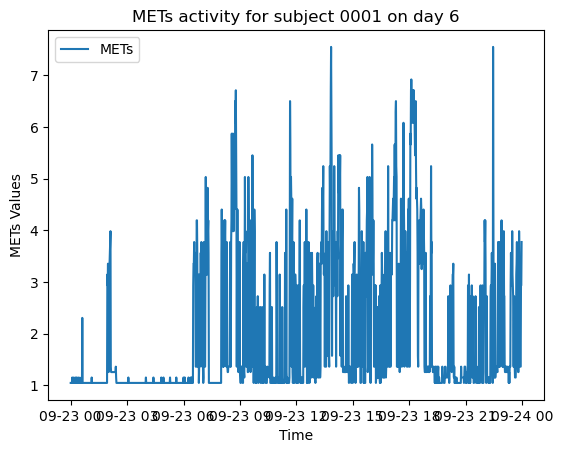

In [34]:
subset_mets = calories_df[calories_df['Date_Time'].dt.date == pd.to_datetime(date_array[j]).date()]
today_mets = subset_mets['Calories'].to_numpy()
time_mets = subset_mets['Date_Time']

plt.plot(time_mets, today_mets, label="METs")
plt.xlabel("Time")
plt.ylabel("METs Values")
plt.legend()
plt.title(f'METs activity for subject 0001 on day {j+1}')